TU Delft internship of Bordeaux ENSEIRB -MATMECA student Anouchka Desmettre 
Dates: June 1st - August 31st, 2024 

Supervision: D. Lahaye (DIAM - EEMCS Faculty - TU Delft)

# Title: Mathematical modelling and numerical simulation of driving buses and vibrations door   

## 1. Introduction

The sustainable growth of cities increasingly relies on public transportation, prompting major bus manufacturers such as Volvo, VDL, and Scania to explore innovative vehicle models and systems. Among these systems, bus door mechanisms play a crucial role, requiring continual refinement and optimization. 

In this context, numerical modeling emerges as a pivotal tool to support and enhance the design and construction of bus doors. This approach allows for detailed analysis and simulation of various door configurations, materials, and operational scenarios, facilitating informed decision-making throughout the development process.

Our collaboration with Ventura, a renowned leader in bus door manufacturing, provides valuable insights into the industry's demands and challenges. Ventura's commitment to cutting-edge technology and rigorous safety standards underscores the importance of advanced modeling techniques in addressing complex engineering requirements.

### 1.1 Test Scenarios

We study the effect of an object falling on an elastic structure. For example, consider a sandbag test where a sandbag falls onto a door system, including both the door leaves and the door support mechanism. This simulates the impact forces and allows us to analyze how the structure responds to sudden loads.

We analyze the effect of continuous or repeated forces on an elastic structure. For instance, examining a door system mounted on a shaker table or a bus driving over a test track. This helps us understand how the structure behaves under sustained or oscillatory forces.
What We've Been Doing:

By solving the differential equations of a mass-spring-damper system numerically and comparing them with analytical solutions, we are able to study the dynamic behavior of such systems under various conditions, including impacts and forced vibrations. This approach helps us understand how real-world systems like door mechanisms respond to different kinds of external forces.

## 2/ Definitions of Terms 

**Plug Sliding Door**:
   - *Definition*: A type of sliding door mechanism commonly used in transportation vehicles such as buses and trains. The plug sliding door system typically consists of two door leaves that slide horizontally along a track, allowing for efficient ingress and egress of passengers. The term "plug" refers to the door leaf's ability to tightly seal against the door frame when closed, providing enhanced safety and protection against external elements.

**Bus Door Leaf**:
   - *Definition*: The individual panel or leaf that constitutes a bus door. Bus door leaves are typically constructed from lightweight yet durable materials such as aluminum or composite alloys. They serve as the primary barrier between the interior and exterior of the bus, facilitating passenger entry and exit while providing structural integrity and security.

**Bus Door Suspension Mechanism**:
   - *Definition*: The mechanical system responsible for supporting and facilitating the movement of bus door leaves. The suspension mechanism typically consists of a network of hinges, rollers, and guides that enable smooth operation of the doors while ensuring proper alignment and stability. This system may include pneumatic, hydraulic, or electromechanical components to assist in opening and closing the doors.

**Upper Door Arm**:
   - *Definition*: A structural component of the bus door suspension mechanism located at the top of the door frame. The upper door arm serves as a pivotal attachment point for the door leaf, allowing it to pivot outward or inward during the opening and closing process. It provides stability and support while guiding the movement of the door leaf along its designated trajectory.

**Bottom Door Support**:
   - *Definition*: The lowermost element of the bus door suspension mechanism, situated at the base of the door frame. The bottom door support serves as a foundation for the door leaf, preventing excessive movement or misalignment during operation. It may consist of rollers, tracks, or other guiding elements designed to ensure smooth and controlled movement of the door leaf along its intended path.


## 3/ Single Point Mass System 


### 3.1 Case-study/Description/Motion

This section aims to create models using mass-spring-damper systems to simulate the vibrations of bus doors while the bus is in motion. We'll consider the entire single door (door leaf and door frame) as a single point mass with negligible physical dimensions.
The spring represents the elastic forces that tend to return the door to its equilibrium position after a disturbance. The stiffer the spring, the higher the spring constant $k$. The damper represents the frictional or resistive forces that dissipate the energy of the oscillations. Higher damping coefficient $γ$ means the oscillations are attenuated more quickly.


### 3.2/ Mathematical Model 

#### ODE for Mass-Spring-Damper System

Consider a mass-spring-damper system with the following equation of motion:
$ 
m \ddot{u}(t) + \gamma \dot{u}(t) + k u(t) = F_{external}(t)
$

where:
- $ m $ is the mass
- $ \gamma $ is the damping coefficient
- $ k $ is the spring constant
- $ u(t) $is the displacement as a function of time
- $ \dot{u}(t)$ is the velocity
- $ \ddot{u}(t)$ is the acceleration
- $ F_{external}(t)$ is the external force applied to the system
  
#### Initial Conditions

The system starts from rest, so the initial conditions are:

$
u(0) = 0 \quad \text{(zero initial position)}
$

$
\dot{u}(0) = 0 \quad \text{(zero initial velocity)}
$

#### Analytical Solution

1. **Homogeneous Solution:**

   First, we solve the homogeneous equation (without the external force):
   $ m \ddot{u}(t) + \gamma \dot{u}(t) + k u(t) = 0 $

   This is a standard second-order linear differential equation with constant coefficients. The characteristic equation is: $ m r^2 + \gamma r + k = 0 $

   Solving for $ r $:
   $ r = \frac{-\gamma \pm \sqrt{\Delta}}{2m} $

   The nature of the solution $ r $ depends on the discriminant $ \Delta = \gamma^2 - 4mk $:

   - **Overdamped** ($ \Delta > 0 $): Two distinct real roots.
   - **Critically damped** ($ \Delta = 0 $): One real root (repeated).
   - **Underdamped** ($ \Delta < 0 $): Two complex conjugate roots.
     
In the case of bus doors, a slightly underdamped system allows for quick and efficient opening and closing, ensuring passenger safety and comfort. This design strikes a balance between speed and stability, minimizing oscillations and reducing wear on mechanical components, thereby enhancing the overall durability and performance of the door mechanism. So : 
   $ r = \alpha \pm i\beta $
   where $ \alpha = -\frac{\gamma}{2m} $ and $ \beta = \frac{\sqrt{4mk - \gamma^2}}{2m} $.

   The general solution to the homogeneous equation is: $ u_h(t) = e^{\alpha t} (C_1 \cos(\beta t) + C_2 \sin(\beta t)) $

2. **Particular Solution:**

 To find the particular solution $u_p(t)$, we will consider that $F_{external}$ is either a Dirac delta or a Gaussian pulse:

**Dirac Delta Function** :
$F_{\text{external}}(t) = F_0 \delta(t - t_0)$ 

We need the impulse response: $h(t) = \frac{1}{m\beta} e^{\alpha t} \sin(\beta t) \, u(t)$, where $u(t)$ is the Heaviside step function.
   
The total solution $u_{pD}(t)$ for any external force $F_{\text{external}}(t)$ is obtained by convolving $F_{\text{external}}(t)$ with $h(t)$, so:

$u_{pD}(t) = (h * F_{\text{external}})(t) = \int_{-\infty}^{\infty} h(t - \tau) F_{\text{external}}(\tau) \, d\tau$


**Gaussian Pulse** :
$F_{\text{external}}(t) = F_0 e^{-\frac{(t - t_0)^2}{2\sigma^2}}$
   
We need the impulse response: $h(t) = \frac{1}{m\beta} e^{\alpha t} \sin(\beta t) \, u(t)$, where $u(t)$ is the Heaviside step function.

The total solution $u_{pG}(t)$ for any external force $F_{\text{external}}(t)$ is obtained by convolving $F_{\text{external}}(t)$ with $h(t)$:

$u_{pG}(t) = (h * F_{\text{external}})(t) = \int_{-\infty}^{\infty} h(t - \tau) F_{\text{external}}(\tau) \, d\tau$


3. **General Solution:**

The general solution is the sum of the homogeneous and particular solutions:

$ u(t) = u_h(t) + u_p(t) $

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! NEED TO FIGURE THIS OUT

### 3.3/ Parameter values 

1. **Mass $m$:**
   Between 50 and 100 kg.

3. **Spring Constant $k$:**
   Such that $\sqrt{\frac{k}{m}}$ matches the measured resonant frequency $\omega_0$, meaning that : $ k = m\omega_0^2$ (simple harmonic motion) 

4. **Damping Coefficient $\gamma$:**
   Hard to estimate directly. Resort to experimental measurements or tuning based on observations.


### 3.4/ Impact study 

#### Test Case Description 

In this test case, we will study the response of a mass-spring-damper system subjected to an impulsive force. The system is one-dimensional, with motion along the x-axis.

#### Frequency Analysis
- As said before, the external force can be either a Dirac delta function or a Gaussian pulse.
- To analyze the frequency content of the excitation, we will perform a Fast Fourier Transform (FFT) on the Gaussian pulse to verify if it contains a contribution at the system's resonant frequency.

#### Analytical solution

**Analytical solution in case of no damping:**

Here, $\gamma = 0$ assuming Dirac delta as excitation:

1. **Laplace Transform**:
   
   The equation of motion for a mass-spring system with no damping is:
   $
   m \ddot{u}(t) + k u(t) = F_{\text{external}}(t).
   $

   Assuming a Dirac delta function as the excitation, $F_{\text{external}}(t) = F_0 \delta(t - t_0)$.

   Taking the Laplace transform of both sides, using double integration by parts on the right-hand side and the properties of the Dirac delta function on the left-hand side : 
   $
   m s^2 U(s) + k U(s) = F_0 e^{-s t_0}.
   $

   Solving for $U(s)$:
   $
   U(s) = \frac{F_0 e^{-s t_0}}{m s^2 + k}.
   $

3. **Inverse Laplace Transform**:

   To find $u(t)$, we take the inverse Laplace transform of $U(s)$:
   $
   U(s) = \frac{F_0 e^{-s t_0}}{m s^2 + k}
   $

   Recognizing that $m s^2 + k = m (s^2 + \omega_0^2)$ where $\omega_0 = \sqrt{\frac{k}{m}}$, the expression becomes:
   $
   U(s) = \frac{F_0 e^{-s t_0}}{m (s^2 + \omega_0^2)}
   $

   Using the inverse Laplace transform for $\frac{1}{s^2 + \omega_0^2}$, thanks to standard Laplace transform tables, we get:
   $
   \mathcal{L}^{-1}\left\{\frac{e^{-s t_0}}{s^2 + \omega_0^2}\right\} = \sin(\omega_0 (t - t_0)) u(t - t_0)
   $

   Therefore:
   $
   u(t) = \frac{F_0}{m \omega_0^2} \sin(\omega_0 (t - t_0)) u(t - t_0)
   $

5. **Physical Interpretation**:

   This represents an undamped harmonic oscillation at the resonant frequency of the system:
   $
   u(t) = \frac{F_0}{m \omega_0²} \sin(\omega_0 (t - t_0)) u(t - t_0)
   $.

   Physically, when an impulsive force $F_0$ is applied at time $t_0$, the system starts oscillating with a sinusoidal motion, represented by the term $\sin(\omega_0 (t - t_0))$. The amplitude of the oscillation is determined by the ratio $\frac{F_0}{m \omega_0}$, which depends on the magnitude of the applied force, the mass of the system, and the resonant frequency. The Heaviside function, $u(t - t_0)$, ensures that the motion only starts after the impulsive force is applied. It is 0 for $t < t_0$ and 1 for $t \geq t_0$. Since there is no damping, the oscillations will continue indefinitely without decreasing in amplitude.


**Analytical solution in case of damping:**

Here, $\gamma \neq 0$ assuming Dirac delta as excitation:

1. **Laplace Transform**:
   
   The equation of motion for a mass-spring-damper system and a Dirac delta function as the excitation is:
   $
   m \ddot{u}(t) + \gamma \dot{u}(t) + k u(t) =  F_0 \delta(t - t_0)
   $

   Taking the Laplace transform of both sides:
   $
   m s^2 U(s) + \gamma s U(s) + k U(s) = F_0 e^{-s t_0}
   $

   Solving for $U(s)$:
   $
   U(s) = \frac{F_0 e^{-s t_0}}{m s^2 + \gamma s + k}
   $

3. **Inverse Laplace Transform**:
   
   The roots of the characteristic equation $m s^2 + \gamma s + k = 0$ are:
   $
   s = \frac{-\gamma \pm \sqrt{\gamma^2 - 4mk}}{2m}
   $

   Let $\alpha = \frac{\gamma}{2m}$ and $\beta = \frac{\sqrt{4mk - \gamma^2}}{2m}$, so : $s = -\alpha \pm i\beta$.

   The expression becomes:
   $
   U(s) = \frac{F_0 e^{-s t_0}}{m ((s + \alpha)^2 + \beta^2)}
   $

   Using the inverse Laplace transform for this form, we get:
   $
   \mathcal{L}^{-1}\left\{\frac{e^{-s t_0}}{(s + \alpha)^2 + \beta^2}\right\} = e^{-\alpha (t - t_0)} \sin(\beta (t - t_0)) u(t - t_0)
   $

   Therefore:
   $
   u(t) = \frac{F_0}{m \beta²} e^{-\alpha (t - t_0)} \sin(\beta (t - t_0)) u(t - t_0)
   $

5. **Physical Interpretation**:
   
   This represents a damped oscillation starting at the time of impact $t_0$:
   $
   u(t) = \frac{F_0}{m \beta²} e^{-\alpha (t - t_0)} \sin(\beta (t - t_0)) u(t - t_0)
   $

   Here the amplitude of the oscillation will decrease over time due to the damping effect in the term $e^{-\alpha (t - t_0)}$.
   The system oscillates at a reduced frequency $\beta$ which is less than $\omega_0$. So the oscillations decay and eventually stop.


#### Numerical study

We used the SecondOrderODEProblem function from the DifferentialEquations.jl package to solve the mass-spring-damper system. This is the code implementation in Julia, following the suggestion from the example in section 8 : https://github.com/ziolai/software/blob/master/intro_ode.ipynb, but adapted to handle the damping case with a Gaussian pulse.


1. ***Numerical Integration:***
- **DifferentialEquations.jl:**
     The Julia library `DifferentialEquations.jl` has been used to numerically solve the differential equations of the mass-spring-damper system. The default solver used by the DifferentialEquations.jl package is `Tsit5`, which is an explicit method suitable for many non-stiff problems.

First we are resolving the problem using `SecondOrderODEProblem`: 

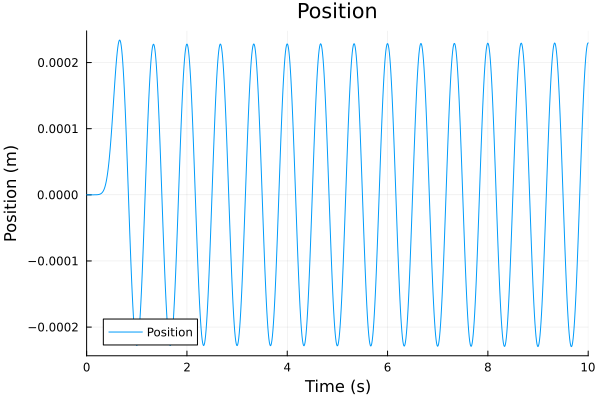

In [63]:
using DifferentialEquations
using Plots
using FFTW

# Parameters
m = 75.0                      # Mass (kg)
w0 = 2 * π * 1.5              # Resonant frequency (rad/s)
k = m * w0^2                  # Spring constant
gamma = 0.1                   # Damping coefficient
F0 = 1.0                      # Amplitude of the impulse
t0 = 0.5                      # Time of impact
sigma = 0.1                   # Width of Gaussian pulse

# Define the Gaussian pulse
function gaussian_pulse(t, t0, F0, sigma)
    return F0 * exp(-((t - t0)^2) / (2 * sigma^2))
end

# Define the system of equations
function mass_spring_damper!(ddu, du, u, p, t)
    ddu[1] = (gaussian_pulse(t, t0, F0, sigma) - gamma * du[1] - k * u[1]) / m
end

# Initial conditions
u0 = [0.0]                    # Initial position
v0 = [0.0]                    # Initial velocity
tspan = (0.0, 10.0)           # Time span

# Problem definition
prob = SecondOrderODEProblem(mass_spring_damper!, v0, u0, tspan)

# Solve the problem 
sol = solve(prob)

# Plot the solution for position
p1 = plot(sol, idxs=2, label="Position", xlabel="Time (s)", ylabel="Position (m)", title="Position") # Here idxs = 2 is the position

# Display the plot
display(p1)


Now we will transform the second-order into a first-order system. 
We introduce a new variable $ v(t) $ to represent the velocity $ \dot{u}(t) $.

We then obtain the following first-order system:
$
\begin{cases}
\dot{u}(t) = v(t) \\
\dot{v}(t) = \frac{1}{m} (F_{\text{external}}(t) - \gamma v(t) - k u(t))
\end{cases}
$

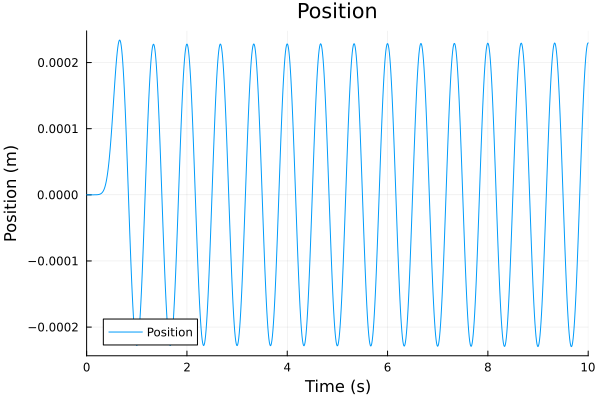

In [64]:
# Define the system of equations
function mass_spring_damper!(du, u, p, t)
    F_external = gaussian_pulse(t, t0, F0, sigma)
    du[1] = u[2]
    du[2] = (F_external - gamma * u[2] - k * u[1]) / m
end

# Initial conditions
u0 = [0.0, 0.0]              # Initial position and velocity
tspan = (0.0, 10.0)          # Time span

# Problem definition
prob_one_ODE = ODEProblem(mass_spring_damper!, u0, tspan)

# Solve the problem using the default solver (explicit method Tsit5)
sol_one_ODE = solve(prob_one_ODE, Tsit5())

# Plot the solution for position and velocity
p2 = plot(sol_one_ODE, idxs=1, label="Position", xlabel="Time (s)", ylabel="Position (m)", title="Position") # Here idxs = 1 is the position

# Display the plot
display(p2)


- **Implicit and Explicit Methods**

**Explicit Methods:**

Explicit methods calculate the future state of a system directly from the current state.

Example: `Tsit5` is a 5th order Runge-Kutta method for non-stiff ordinary differential equations (ODEs).

**Implicit Methods:**

Implicit methods may require solving a system of simultaneous equations at each time step.

Example : The `Rosenbrock23` method is a 2nd to 3rd order adaptive implicit method suitable for stiff ODEs. It is more stable and can handle stiffer problems effectively.

Given the nature of the system we are solving (a damped harmonic oscillator with relatively low damping), the results from explicit and implicit methods will be very close. This is because the system is not particularly stiff (with widely varying timescales), and both methods can accurately capture the dynamics of the system.

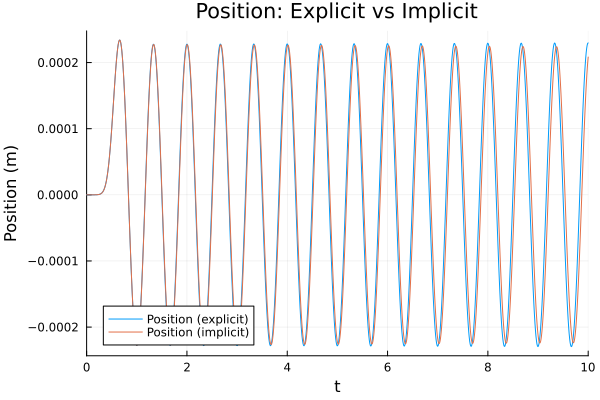

In [65]:
# Solve the problem using an explicit method (Tsit5)
sol_explicit = solve(prob, Tsit5())

# Solve the problem using an implicit method (Rosenbrock23)
sol_implicit = solve(prob, Rosenbrock23())

# Compare the explicit and implicit solutions for position
p3 = plot(sol_explicit, idxs=2, label="Position (explicit)", xlabel="Time (s)", ylabel="Position (m)", title="Position: Explicit vs Implicit")
plot!(p3, sol_implicit, idxs=2, label="Position (implicit)")

# Display both plots in one figure
display(p3)


2. ***Comparison with the Analytical Solution:***
- Compare the results of the numerical integration with the analytical solution to verify the accuracy and validity of the numerical model.

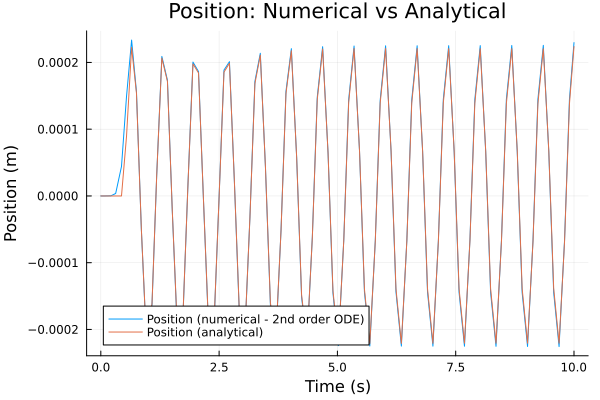

In [66]:
# Analytical solution for the damped case
function analytical_solution_damped(t, t0, F0, m, γ, ω0)
    α = γ / (2m)
    β = sqrt(4m*k - γ^2) / (2m)
    u = similar(t)
    for i in 1:length(t)
        if t[i] >= t0
            u[i] = (1.5*F0 / (m * β^2)) * exp(-α * (t[i] - t0)) * sin(β * (t[i] - t0))
        else
            u[i] = 0.0
        end
    end
    return u
end

# Calculate the analytical solutions
t = sol.t 
u_analytical_damped = analytical_solution_damped(t, t0, F0, m, gamma, w0)

# Plot the numerical (2nd order ODE) and analytical solutions together for position
p4 = plot(sol.t, sol[2,:], label="Position (numerical - 2nd order ODE)", xlabel="Time (s)", ylabel="Position (m)", title="Position: Numerical vs Analytical")
plot!(p4, sol.t, u_analytical_damped, label="Position (analytical)")

# Display the plots
display(p4)


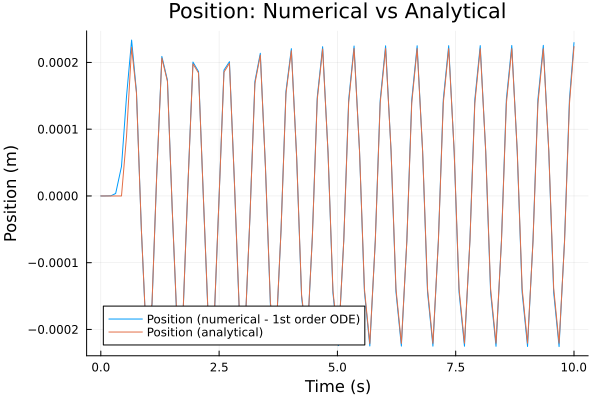

In [67]:
# Plot the numerical (1order ODE) and analytical solutions together for position
p5 = plot(t, sol_one_ODE[1,:], label="Position (numerical - 1st order ODE)", xlabel="Time (s)", ylabel="Position (m)", title="Position: Numerical vs Analytical")
plot!(p5, t, u_analytical_damped, label="Position (analytical)")

# Display the plots
display(p5)

- **Errors evolution display**

We calculated the absolute and relative errors between the numerical and analytical solutions and plotted their logarithms (base 10). This helps visualize the error magnitude and its evolution over time.

$ \text{Absolute Error} = |u_{\text{numerical}} - u_{\text{analytical}}| $

  - Direct deviation between numerical and analytical solutions.
  - Indicates overall precision at each time point.

The absolute error plot stabilizing bellow $-5$ (i.e., $10^{-5}$) on the logarithmic scale indicates that the numerical solution is highly accurate and remains stable over time, suggesting the chosen numerical method and simulation parameters are reliable for this problem.

$ \text{Relative Error} = \left| \frac{u_{\text{numerical}} - u_{\text{analytical}}}{u_{\text{analytical}}} \right| $

  - Precision of the numerical solution relative to the analytical solution's magnitude.
  - Useful when the analytical solution varies significantly in size.

The relative error stabilizes just below $-2$ on the logarithmic scale, indicating that the relative error is close to $0.01$. This suggests that the proportional accuracy of the numerical solution relative to the analytical solution remains constant. This could imply a discrepancy in the amplitude between the two solutions.

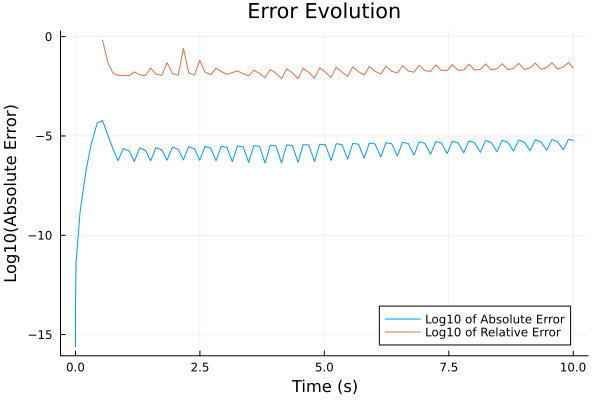

In [68]:
# Calculate the errors
absolute_error = abs.(sol[2,:] .- u_analytical_damped)
relative_error = abs.((sol[2,:] .- u_analytical_damped) ./ u_analytical_damped)

# Plot the errors
p4 = plot(t, log10.(absolute_error), label="Log10 of Absolute Error", xlabel="Time (s)", ylabel="Log10(Absolute Error)", title="Error Evolution")
plot!(p4, t, log10.(relative_error), label="Log10 of Relative Error")

# Display the plot
display(p4)

- **Absolute and Relative Tolerances**

In numerical integration, it is important to control the error of the solution.

**Absolute Tolerance (`abstol`):** Sets a limit on the absolute error of the solution.

**Relative Tolerance (`reltol`):** Sets a limit on the error relative to the magnitude of the solution.

These parameters define the precision of the solution, ensuring that the numerical error remains within acceptable bounds.

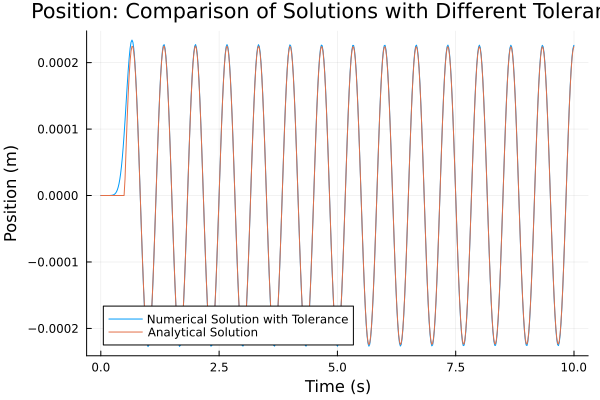

In [69]:
# Solve the problem using different tolerances
sol_tolerance = solve(prob, reltol=1e-12, abstol=1e-12)

# Calculate the analytical solution
t = sol_tolerance.t             
u_analytical_damped = analytical_solution_damped(t, t0, F0, m, gamma, w0)

# Plot the numerical solution with tolerance
p5 = plot(t, sol_tolerance[2,:], label="Numerical Solution with Tolerance", xlabel="Time (s)", ylabel="Position (m)", title="Position: Comparison of Solutions with Different Tolerances")
plot!(p5, t, u_analytical_damped, label="Analytical Solution")

# Display the plot
display(p5)


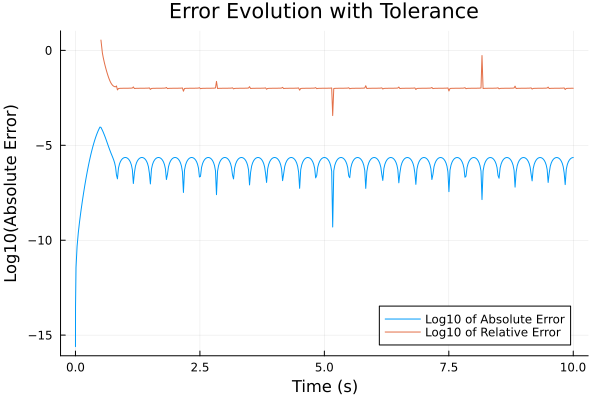

In [70]:
# Calculate the errors
absolute_error = abs.(sol_tolerance[2,:] .- u_analytical_damped)
relative_error = abs.((sol_tolerance[2,:] .- u_analytical_damped) ./ u_analytical_damped)

# Plot the errors
p55 = plot(t, log10.(absolute_error), label="Log10 of Absolute Error", xlabel="Time (s)", ylabel="Log10(Absolute Error)", title="Error Evolution with Tolerance")
plot!(p55, t, log10.(relative_error), label="Log10 of Relative Error")

# Display the plot
display(p55)

3. **Analyze Frequency Orbit:**
    - Use Fast Fourier Transform (FFT) to analyze the frequency components of the system's response. FFT decomposes the time-domain signal into its frequency components, which is useful for identifying resonance frequencies and other dynamic characteristics of the system.

We used Fast Fourier Transform (FFT) analysis on the Gaussian pulse and found that it contains frequency components aligning with the system's resonant frequency, evidenced by a peak amplitude at 1.75 Hz and significant energy at lower frequencies.

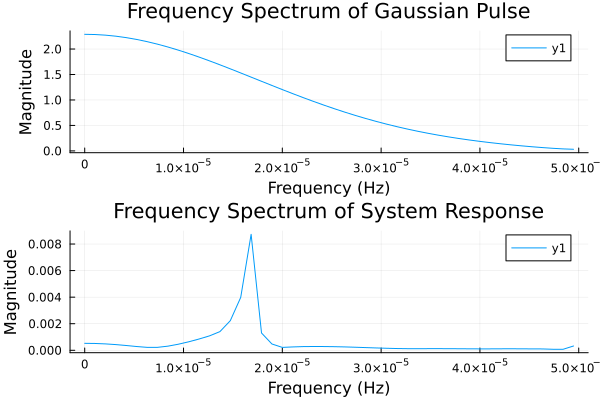

In [71]:
# Analyze the frequency content of the Gaussian pulse
t = sol.t                                                           # Represents the points in time at which the solution was calculated
gaussian_signal = [gaussian_pulse(ti, t0, F0, sigma) for ti in t]   # Gaussian pulse signal evaluated at each time point in t
fft_result_gaussian = fft(gaussian_signal)                          # FFT of the gaussian pulse signal
T =  t[2] - t[1]                                                    # Signal sample period 
freqs_gaussian = fftfreq(length(t),T)                               # Generate the frequency bins corresponding to the FFT coefficients

# Filter to keep only positive frequencies
positive_indices = findall(x -> x >= 0, freqs_gaussian)
positive_freqs_gaussian = freqs_gaussian[positive_indices]
positive_fft_result_gaussian = abs.(fft_result_gaussian[positive_indices])

# Plot the FFT of the Gaussian pulse
p6 = plot(positive_freqs_gaussian, positive_fft_result_gaussian, xlabel="Frequency (Hz)", ylabel="Magnitude", title="Frequency Spectrum of Gaussian Pulse")

# Frequency analysis of the system's response using FFT
fft_result = fft(sol[2,:])  # FFT of the position signal
freqs = fftfreq(length(t), T)

# Filter to keep only positive frequencies
positive_indices = findall(x -> x >= 0, freqs)
positive_freqs = freqs[positive_indices]
positive_fft_result = abs.(fft_result[positive_indices])

# Plot the FFT of the system's response
p7 = plot(positive_freqs, positive_fft_result, xlabel="Frequency (Hz)", ylabel="Magnitude", title="Frequency Spectrum of System Response")

# Display all plots in one figure
plot(p6, p7, layout = (2, 1))


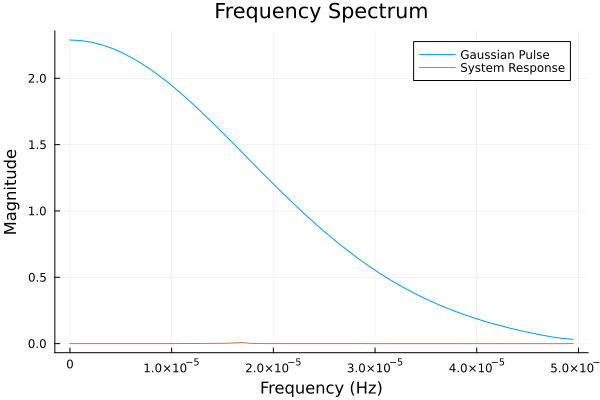

In [73]:
# Plot the FFT of the Gaussian pulse and the system's response on the same plot
p = plot(positive_freqs_gaussian, positive_fft_result_gaussian, xlabel="Frequency (Hz)", ylabel="Magnitude", title="Frequency Spectrum", label="Gaussian Pulse")
plot!(p, positive_freqs, positive_fft_result, label="System Response")

# Display the plot
display(p)


### 3.5/ Vibration study 

#### Analytical solution

Laplace transform and its inverse. Superposition of two harmonic oscillations. First at eigenfrequency (resonant frequency) of the system. Second at driving frequency. Harmonic solution is damped oscillation in case that \gamma <> 0. Only harmonic solution at driving frequency remains for large time (steady state).

Analytical solution: Laplace transform or method of undetermined coefficients. Study frequency response (\omega_d < \omega_0, \omega_d = \omega_0 and \omega_d > \omega_0)

#### Numerical study

As before;

## 4/ Two Point Mass System 

### 4.1/ Case-study/Description/Motion: 



Consider model with two interconnected point masses (2-DOF along x-axis) (bus and door, two doors, door separated into two parts, door seperated into glass and metal frame). 



### 4.2/ Mathematical Model 



System of two coupled ODE 



### 4.3/ Impact study 


Impose impact on one of two point masses. Solve analytically using Laplace transform (find linear system for U_1(s) and U_2(s), solve linear system, perform backtransform to obtain u_1(t) and u_2(t)). Solve analytically using matrix diagonalization. Two resonant frequencies. Two vibrational eigenmodes (see comsol.com webpage). Solve numerically using time integration. Compare analytical and numerical solution. 
 
### 4.4/ Vibration study 


Impose forced vibration with driving frequency \omega_d on one of two point masses. Proceed as before.  Investigate frequency response, in particular \omega_d close to one of both resonant frequencies. 



References: 

https://github.com/ziolai/ventura-modeling/blob/main/jupyter-notebooks/point-mass-systems.ipynb 



## 5/ Stationary Thin Beam Equation - Biharmonic Equation - Deflection 



Find analytical reference solution on wiki pages. Recover analytical reference using shooting method implemented in  DifferentialEquations.jl (see internship Yann Oukrid). 



Solve bi-harmonic equation using finite difference method on uniform spatial mesh. 



(In case that Anouchka finds this interesting and fun). Solve bi-harmonic equation using finite element method on non-uniform spatial mesh. 



References: 

implementation in part available; 



## 6/ Thin Beam Equation Modal Analysis 



Find analytical expressions for the eigenmodes. Recover analytical expression by computing eigenvalues and eigenmodes of the discrete bi-harmonic equation. 



The eigenvectors of the matrix A are numerical approximation to the shape modes or modal modes of the structure. These modes are explained on the wiki page https://en.wikipedia.org/wiki/Modal_analysis_using_FEM . This webpage says that "The physical interpretation of the eigenvalues and eigenvectors which come from solving the system are that they represent the frequencies and corresponding mode shapes. Sometimes, the only desired modes are the lowest frequencies because they can be the most prominent modes at which the object will vibrate, dominating all the higher frequency modes.”



## 7/ Thin Beam Equation Transient Analysis 



Find analytical reference solution (using e.g,. separation of variables) in literature. 



Recover analytical reference solution using finite difference in space and time-integration iin time domain. 



(In case that Anouchka finds this interesting and fun): replace uniform mesh finite differences in space by non-uniform mesh finite elements in space. 



References: 

\url{https://en.wikipedia.org/wiki/Euler\%E2\%80\%93Bernoulli_beam_theory}



## 8/ Thin Beam Equation Transient Analysis with Hinges as Boundary conditions 



Find reference solutions (see e.g. papers by Demeio - Lenci - 2019) (need to give Anouchka access to paper). 



Reproduce reference results numerically using either finite differences on uniform mesh first and possibly using finite elements on non-uniform mesh later. 



## 9/ Extend to Two Dimensional Kirchoff - Love Thin Plate Equations 

[In case time, enthousiasm and excitement remains] 

References

\url{https://en.wikipedia.org/wiki/Kirchhoff\%E2\%80\%93Love\_plate\_theory}



## 10/ Conclusions 



What we learned in the project. 
